# Applied Statistics Final Project
## Ronald Adomako
12/9/19

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.regression.linear_model as sm
import statsmodels.api as smApi
from statsmodels.formula.api import ols

import cartopy.crs as ccrs
import geopandas as gpd
import cartopy.io.shapereader as shpreader

%matplotlib inline

In [78]:
column = ["year", "month", "day", "hour", "LAT", "LON", "ISST","OSST",
 "OERR", "SI", "ICflag", "DS", "VS", "WDIR", "WSPD", "SLP",
 "AT", "WBT", "DPT", "CLT", "CLL"]
len(column)

21

In [79]:
DB = pd.read_csv("DB_33944.csv", names = column)
MB = pd.read_csv("MB_62413.csv", names = column)
SH = pd.read_csv("SH_GDLS.csv", names = column)

# Mooring Buoy

In [80]:
'''High Quality Flags'''

HQ_MB = sum(MB['ICflag']==1)
print(HQ_MB)

9207


In [81]:
'''Low Quality Flags'''

total_MB = MB['ICflag'].count()
LQ_MB = total_MB - HQ_MB
print(LQ_MB)

19


In [82]:
print('High quality flag percentage of mooring buoys: %f'%round(100*(HQ_MB/total_MB),2)+'%')

High quality flag percentage of mooring buoys: 99.790000%


In [83]:
MB.head()

,year,month,day,hour,LAT,LON,ISST,OSST,OERR,SI,...,DS,VS,WDIR,WSPD,SLP,AT,WBT,DPT,CLT,CLL
0,1991,11,18,12,51.9,3.2,10.6,10.83,0.35,NaN,...,0.0,0.0,190.0,8.7,999.1,11.1,NaN,11.0,NaN,NaN
1,1991,11,18,22,51.9,3.2,10.6,10.83,0.35,NaN,...,0.0,0.0,160.0,6.7,998.0,10.4,NaN,9.8,NaN,NaN
2,1991,11,18,23,51.9,3.2,10.6,10.83,0.35,NaN,...,0.0,0.0,160.0,7.7,998.0,10.4,NaN,10.3,NaN,NaN
3,1991,11,19,6,51.9,3.2,10.7,10.37,0.32,NaN,...,0.0,0.0,90.0,8.2,999.5,9.8,NaN,9.7,NaN,NaN
4,1991,11,19,12,51.9,3.2,10.6,10.37,0.32,NaN,...,0.0,0.0,50.0,13.9,1004.1,8.1,NaN,7.9,NaN,NaN


### Data clean and investigate low quality flags

In [84]:
MB[MB['ICflag']==0]

,year,month,day,hour,LAT,LON,ISST,OSST,OERR,SI,...,DS,VS,WDIR,WSPD,SLP,AT,WBT,DPT,CLT,CLL
465,1992,4,11,17,51.9,3.2,23.5,7.43,0.26,NaN,...,0.0,0.0,NaN,NaN,1017.1,12.6,NaN,3.9,NaN,NaN
1804,1993,4,15,3,0.0,3.2,7.1,28.49,0.32,NaN,...,0.0,0.0,20.0,8.2,1015.4,7.2,6.9,5.7,NaN,NaN
1837,1993,4,22,15,0.0,3.2,7.9,28.83,0.41,NaN,...,0.0,0.0,240.0,6.7,1007.1,9.3,8.9,8.1,NaN,NaN
1839,1993,4,23,16,0.0,3.2,8.0,28.79,0.41,NaN,...,0.0,0.0,120.0,5.1,1005.1,12.6,11.0,9.2,NaN,NaN
1845,1993,4,25,9,0.0,3.2,8.2,28.30,0.32,NaN,...,0.0,0.0,210.0,7.2,1004.0,9.2,9.2,8.8,NaN,NaN
1852,1993,4,27,16,0.0,3.2,8.4,28.36,0.47,NaN,...,0.0,0.0,20.0,12.3,1017.9,10.0,9.3,8.0,NaN,NaN
1893,1993,5,7,9,0.0,3.2,9.1,28.15,0.33,NaN,...,0.0,0.0,30.0,11.8,1025.7,9.8,8.3,6.4,NaN,NaN
1906,1993,5,9,3,0.0,3.2,9.2,28.11,0.33,NaN,...,0.0,0.0,40.0,8.2,1019.9,10.4,9.7,8.3,NaN,NaN
2087,1993,6,22,4,0.0,3.2,13.9,25.81,0.35,NaN,...,0.0,0.0,10.0,4.6,1017.5,13.6,12.3,10.5,NaN,NaN
2108,1993,6,26,9,0.0,3.2,14.2,25.45,0.33,NaN,...,0.0,0.0,210.0,5.7,1020.0,15.0,14.5,13.8,NaN,NaN


#### The year 1993 primarily accounts for the low quality flags, and even so, a few data points out of its entire year. 

Also, note that all the Longitude and Latitude measurements are present for the low quality flags. The NaN (not a number) values are coming from the high quality flags.  We can use pandas dataframe to drop these values and with high confidence that we will still obtain reliable results– see that there are only a few rows of these missing values.

In [132]:
MB2 = MB[["year", "LAT", "LON", "ISST","OSST",
 "OERR", "ICflag"]].dropna()
missing = MB["ISST"].count() - MB2["ISST"].count()
print('number of data missing is: ',missing,'from ISST')
missing = MB['OSST'].count() - MB2['OSST'].count()
print('number of data missing is: ',missing,'from OSST')

number of data missing is:  1 from ISST
number of data missing is:  0 from OSST


### Let's see if our Mooring Buoy is still.

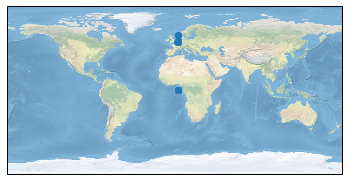

In [133]:
x = np.array(MB2['LON']) 
y = np.array(MB2['LAT'])

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.scatter(x,y);  

### Separate Mooring Buoys

In [134]:
years = {}
array = np.array(MB2[["year","LAT", "LON"]])

for row in array:
    key = int(row[0])
    value = (row[1],row[2])
    if key not in years:
        years[key]=[]
    if value not in years[key]:
        years[key].append(value)
print(years)
    


{1991: [(51.9, 3.2), (59.5, 3.2)], 1992: [(51.9, 3.2), (51.9, 2.5)], 1993: [(51.9, 3.2), (0.0, 3.2), (59.5, 3.2), (51.5, 3.2), (51.9, 3.5)], 1994: [(51.9, 3.2), (51.9, 3.6), (53.2, 3.2)], 1995: [(51.9, 3.2), (52.9, 3.2)], 1996: [(51.9, 3.2)]}


In [135]:
for key in years:
    print('key: %i' %key, ', no. of locations: %d' %len(years[key]))

key: 1991 , no. of locations: 2
key: 1992 , no. of locations: 2
key: 1993 , no. of locations: 5
key: 1994 , no. of locations: 3
key: 1995 , no. of locations: 2
key: 1996 , no. of locations: 1


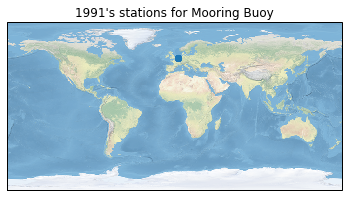

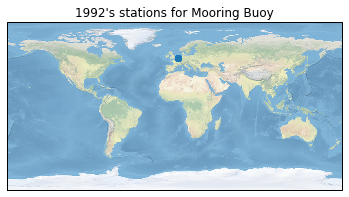

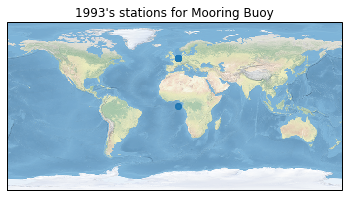

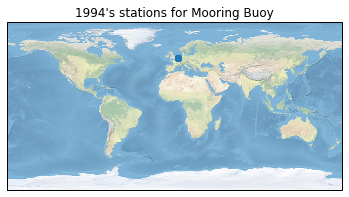

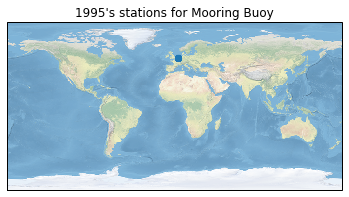

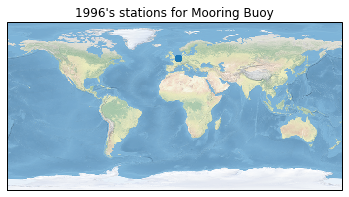

In [146]:
for year in years:
    _ = None
    df = MB2[MB2['year']==year]
    x = np.array(df['LON']) 
    y = np.array(df['LAT'])
    
    _ = plt.subplots()
    _ = plt.axes(projection=ccrs.PlateCarree())
    _ .stock_img()
    _ = plt.title('%i\'s stations for Mooring Buoy' %year)
    _ = plt.scatter(x,y,alpha=0.1); 

Applying an alpha = 0.1 shows that the year 1993 is the only year that has multiple stationed buoys. By inspection this year has two different buoys for this year while the rest has only one.  The plots for the others years can be considered as "wiggle" or error in the data as there are not a significant  number of points to display a mark.

In [90]:
x_MB=np.array(MB['OSST']) 
y_MB=np.array(MB['ISST'])

### By inspection there are two 1993s: 1993A (51.9°, 3.2°) and 1993B (0°, 3.2°)

We can run a hypothesis test on this assumption by comparing the difference between their means. Noting that all of the clean data agrees with a 3.2º line of longitude, we will take any latitude measurement above 25º as belonging to 1993A and measurements below 25º belonging to 1993B. We can run this test for both OSST and ISST. We will assume a normal distribution of data and for each 1993s we will compare the mean for the entire data set to the mean of the assumed location. Our confidence interval will be 95%.

The average for the alternate hypothesis is:  10.629
year      1605
LAT       1605
LON       1605
ISST      1605
OSST      1605
OERR      1605
ICflag    1605
dtype: int64


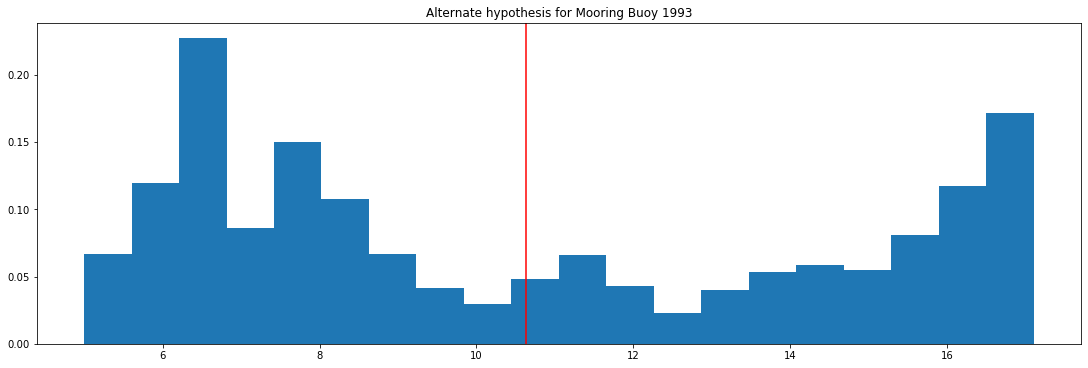

In [234]:
ISST_93A_HA = MB2[MB2['year']==1993]
ISST_93A_HA = ISST_93A_HA[ISST_93A_HA['LAT'] > 25]
meanHA = float(ISST_93A_HA['ISST'].ravel().mean())
print('The average for the alternate hypothesis is: ', round(meanH0,3))
print(ISST_93A_H0.count())

fig, I_93A_HA = plt.subplots(ncols=1, nrows =1, figsize=(15, 5),
                constrained_layout=True, sharey = True, sharex = True)
I_93A_HA = plt.title('Alternate hypothesis for Mooring Buoy 1993')
I_93A_HA = plt.hist(ISST_93A_HA['ISST'].ravel(),bins=20,density = True,label = 'frequency')
I_93A_HA = plt.axvline(meanHA, color='r')

The average for the null hypothesis is:  10.627
year      1607
LAT       1607
LON       1607
ISST      1607
OSST      1607
OERR      1607
ICflag    1607
dtype: int64


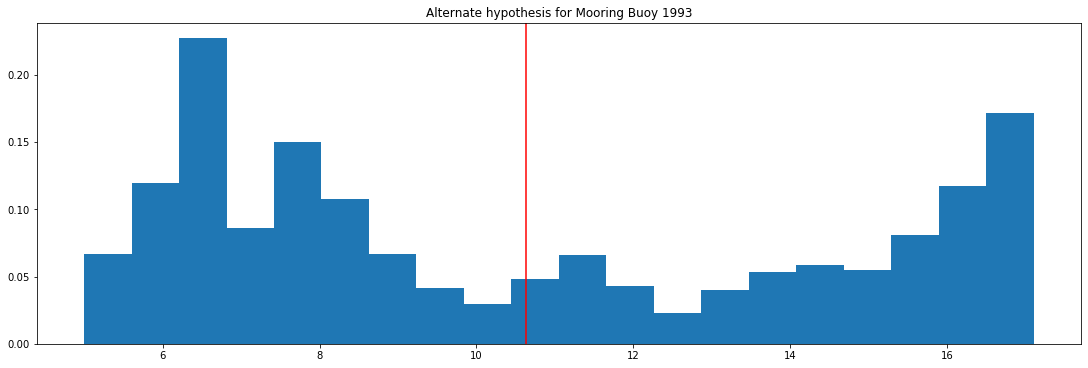

In [237]:
ISST_93A_H0 = MB2[MB2['year']==1993]
ISST_93A_H0 = ISST_93A_H0[ISST_93A_H0['LAT'] > 25]
meanH0 = float(ISST_93A_H0['ISST'].ravel().mean())
print('The average for the null hypothesis is: ', round(meanH0,3))
print(ISST_93A_H0.count())

fig, I_93A_H0 = plt.subplots(ncols=1, nrows =1, figsize=(15, 5),
                constrained_layout=True, sharey = True, sharex = True)
I_93A_H0 = plt.title('Alternate hypothesis for Mooring Buoy 1993')
I_93A_H0 = plt.hist(ISST_93A_H0['ISST'].ravel(),bins=20,density = True,label = 'frequency')
I_93A_H0 = plt.axvline(meanH0, color='r')

(9226,)
(9226,)


MissingDataError: exog contains inf or nans

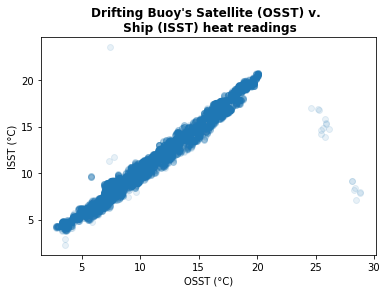

In [91]:
print(x_MB.shape)
print(y_MB.shape)
_ = plt.scatter(x_MB,y_MB,alpha=0.1)
_ = plt.xlabel('OSST (°C)')
_ = plt.ylabel('ISST (°C)')
_ = plt.title('Drifting Buoy\'s Satellite (OSST) v. \n Ship (ISST) heat readings',
             fontweight='bold')
lm = sm.OLS(y_MB, x_MB).fit()
_ = plt.text(5, 15, 'R^2 = ' + str(round(lm.rsquared,3)), horizontalalignment='center', 
             verticalalignment='center')


In [17]:
HQ_DB = sum(DB['ICflag']==1)
print(HQ_DB)

19674


In [18]:
total_DB = DB['ICflag'].count()
LQ_DB = total_DB - HQ_DB
print(LQ_DB)

478


In [19]:
print('High quality flag percentage of drifting buoys: ',round(100*(HQ_DB/total_DB)),'%')

High quality flag percentage of drifting buoys:  98.0 %


In [ ]:
x = np.array(z['LON']) 
    y = np.array(z['LAT'])

    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.stock_img()
    ax.scatter(x,y)

In [20]:
x_DB=np.array(DB['OSST']) 
y_DB=np.array(DB['ISST'])

(20152,)
(20152,)


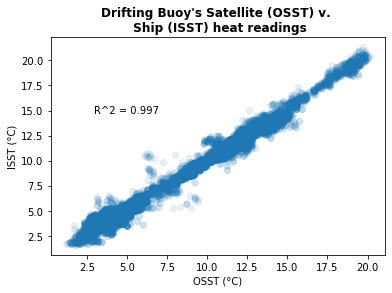

In [21]:
print(x_DB.shape)
print(y_DB.shape)
_ = plt.scatter(x_DB,y_DB,alpha=0.1)
_ = plt.xlabel('OSST (°C)')
_ = plt.ylabel('ISST (°C)')
_ = plt.title('Drifting Buoy\'s Satellite (OSST) v. \n Ship (ISST) heat readings',
             fontweight='bold')
lm = sm.OLS(y_DB,x_DB).fit()
_ = plt.text(5, 15, 'R^2 = ' + str(round(lm.rsquared,3)), horizontalalignment='center', 
             verticalalignment='center')


In [22]:
lm = sm.OLS(y_DB,x_DB).fit()

In [23]:
print("The Drifting Buoy's Rsquared values is " + str(lm.rsquared))

The Drifting Buoy's Rsquared values is 0.997114546636005


In [67]:
def makePlot(buoyStr,df):
    
    'Examine quality flags for ship data'
    HQ_flag = sum(df['ICflag']==1)
    total_flag = df['ICflag'].count()
    LQ_flag = total_flag - HQ_flag
    
    print('High quality flag percentage of '+ buoyStr + '\'s: ',
          round(100*(HQ_flag/total_flag),4),'%')
    
    z = df[['OSST','ISST']]
    z = z.dropna()
    
    x = np.array(z['OSST']) 
    y = np.array(z['ISST'])
    
    _ = plt.subplots()
    _ = plt.scatter(x, y, alpha=0.05,s=1)
    _ = plt.xlabel('OSST (°C)')
    _ = plt.ylabel('ISST (°C)')
    _ = plt.title('Satellite (OSST) v. '+ buoyStr +'\'s v. \n InSutu (ISST) heat readings',
                 fontweight='bold')
    lm = sm.OLS(y, x)
    lm_fit = lm.fit()
    lm = None
    _ = plt.text(5, 15, 'R^2 = ' + str(round(lm_fit.rsquared,3)), 
                 horizontalalignment='center', verticalalignment='center') 
    
    plt.savefig(buoyStr)
    plt.show()
    
    z = df[['LON','LAT']]
    z = z.dropna()
    
    x = np.array(z['LON']) 
    y = np.array(z['LAT'])

    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.stock_img()
    ax.scatter(x,y)
    plt.savefig(buoyStr[:-10])
    
    fig, ax1 = plt.subplots(figsize=(12,8))
    fig = smApi.graphics.influence_plot(lm_fit, alpha  = 0.05, ax = ax1, criterion="cooks")
    plt.savefig('Cook\'s '+ buoyStr[:-10])
    
    return

High quality flag percentage of Drifting Buoy 1995-2010's:  97.628 %


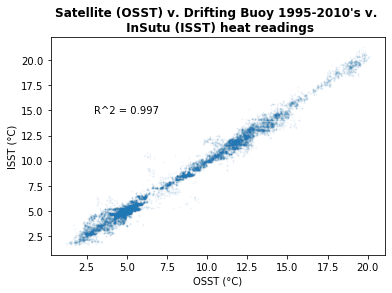

High quality flag percentage of Mooring Buoy 1991-1996's:  99.7941 %


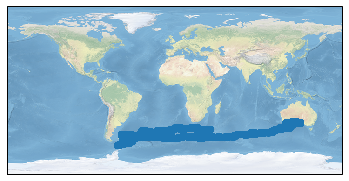

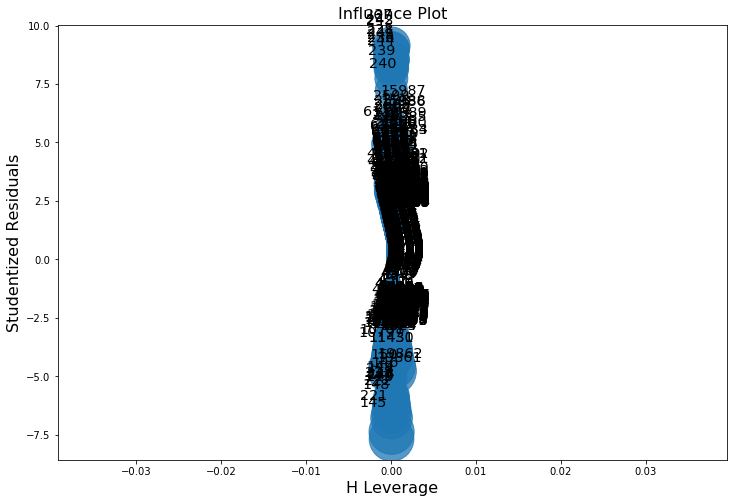

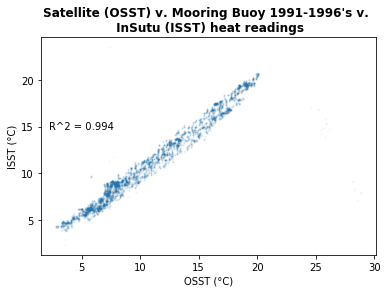

High quality flag percentage of Ship 1991-2006's:  99.9061 %


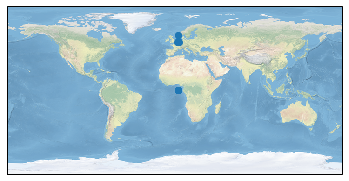

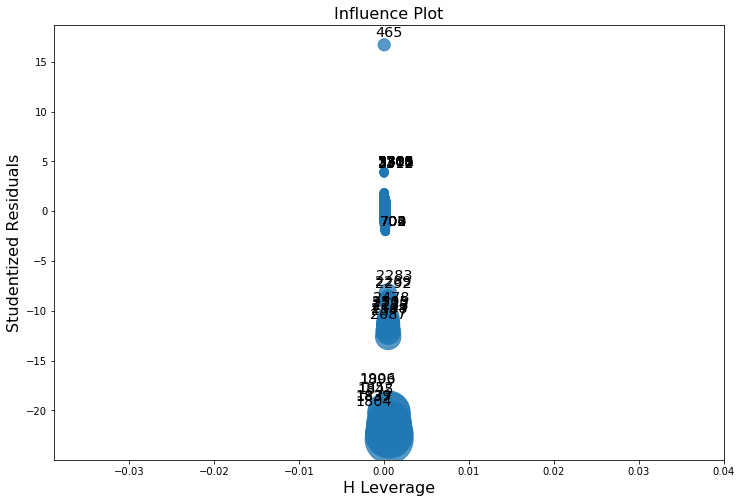

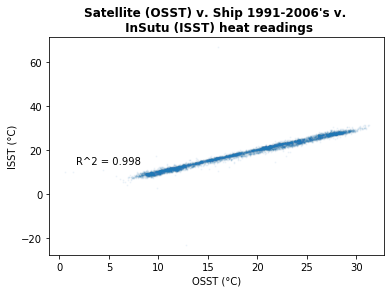

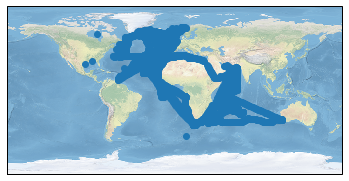

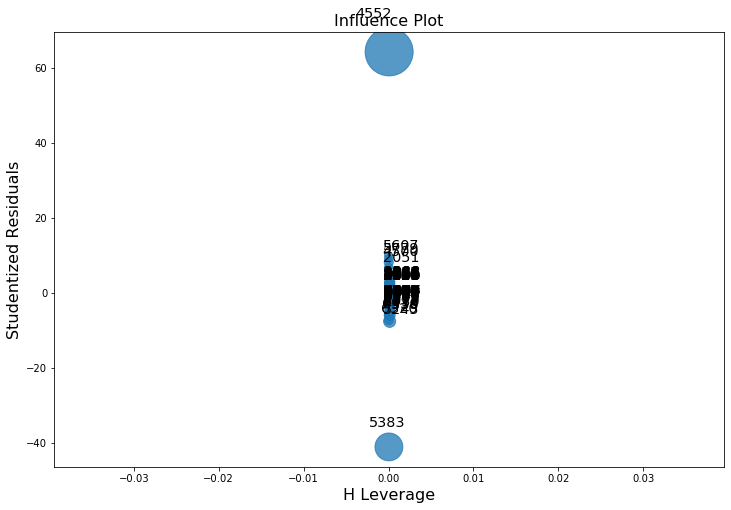

In [68]:
for file in [DB,MB,SH]:
    if file is DB:
        buoyStr = 'Drifting Buoy 1995-2010'
    elif file is MB:
        buoyStr = 'Mooring Buoy 1991-1996'
    else:
        buoyStr = 'Ship 1991-2006'
    
    makePlot(buoyStr,file) 

In [ ]:
x_MB=np.array(MB['OSST']) 
y_MB=np.array(MB['ISST'])

z_MB = MB[['OSST','ISST']]
print(z_MB.count(), 'max')
print('...')
z_MB = z_MB.dropna()
print(z_MB.count(), 'cleaned')
print('...')
print(z_MB)

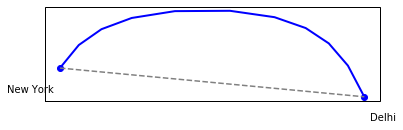

In [27]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
#ax.stock_img()

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='gray', linestyle='--',
         transform=ccrs.PlateCarree(),
         )

plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=ccrs.Geodetic())
plt.show()